# <center>HW3</center> #
####
***

## <u>Question 1</u>

### Implementation
* 本次作業要我們使用目前學過的algorithms來分類wine dataset，並以Scikit-learn的套件來implement它們。
* 以下我將使用總共六種演算法來實現
    * Logistic Regression
    * SVM
    * Kernel SVM
    * Decision Tree
    * Random Forest
    * KNN
* 首先，引入必要使用的modules們，並且把前面的作業用來描繪分類狀況函數plot_decision_regions引入，方便後面呈現演算法分割結果時使用
* 由於wine dataset有多達13種features，為了能夠畫出分割圖來更了解演算法的運作情況，因此我的設計上決定從中挑選「2種」特徵進行實作
* 我的挑選方法是將所有可能的分布圖畫出來，並從中觀察出分散較佳、似乎較能夠被切開的兩特徵，而由於我們有13種features，若採用之前的方法一張張描繪將會有多達78張圖 ($C_2^{13} = 78$)
* 因此，上網查詢了Seaborn套件裡頭有非常方便畫散佈圖的功能，叫做 pairplot，利用這個功能可以很方便的一次將兩兩特徵的分佈圖顯示在一張大圖上，如此一來便可以一目瞭然！
* 而pairplot原始上是會把兩兩互相的全部狀況都畫出來(i.e. 畫出13x13張圖)，但由於是對稱的，而我僅需要觀察兩兩的分布即可，故我就設定**corner = True**參數來讓pairplot只顯示一半，方便觀察
* 除此之外，也利用**SBS algorithm**來看看feature selection的效果，設定上利用KNN做為estimator來選，並一樣選出兩個features畫出散佈圖
* 觀察SBS所決定的兩個features會得到**第0種**, **第9種**這兩項特徵，但可以觀察到分布其實不太乾淨，要用線性分類器去做可能會效果不佳，因此我決定利用前述pairplot的方法來選擇我這次作業使用的特徵
* 故最後在我的設計中，決定選出**第7種**, **第10種**這兩項特徵來使用，因為從圖可略知其點的分布較不密集，推測可較好地被分類
* 接著進行Data processing，一開始決定分割training set和test set的比例，這邊我採用**7:3**進行切分，即70%的dataset當作training set，而30%當作test set，前者訓練model，後者來評估模型的performance
* 切分時須注意均勻程度，若不均勻將會影響model的表現
* 本次作業一樣有使用到「數據標準化」這項技巧，而這次作業可以使用Sklearn裡頭的函數直接進行標準化，並不需要像前面作業一樣手刻
* 同樣地要注意無論是training set, test set，都是使用training set的mean, std來做標準化！(使用fit, transform的時候要小心)<br><br>
* 以下將分六個項目，對每種演算法的實作方式做描述
* Logistic Regression
    * 此種演算法原則上還是linear的切割，與前一次作業的三種演算法類似，但最大的差別在於activation function的應用，此演算法使用**sigmoid function**來讓model的輸出為0~1，可以讓它有類似機率特性的效果
    * 我的參數設定上solver採用 **LBFGS**，因此並不需要調整learning rate，故主要調整的hyper-parameter為 **C**，此參數代表regularization的程度(i.e. penalty)
    * 調參方式是設定幾個不同數量級的C，利用for loop去逐次建立一個全新的model，並進行training跟testing
    * 接著，在每輪的結尾去把model, 準確度等資訊儲存至list中，並再進一步的深入探討來決定最終的model效能(e.g. 考慮overfitting or underfitting)
    * 最後便是觀察decision boundary來更詳盡地了解model的行為，針對performace部分將於discussion部分探討
* Linear SVM
    * 此種演算法利用support vector的原理來，藉由建立適當數量的support vector，去調整切割的邊界，最大化邊界附近sample的距離(i.e. margin)，如此一來能夠提升分類的效果
    * 設定初始上僅將kernel調為linear，而主要調整的參數為 **C**，功能一樣是regularization
    * 調參方式大致與Logistic Regression，故不贅述
    * 最後同樣去觀察decision boundary來更詳盡地了解model的行為，針對performace部分將於discussion部分探討
* Kernel SVM (non-linear SVM)
    * 此種演算法是建立在SVM上，利用kernel function的轉換來達到non linear的切割，概念上是把data set維度提升，如此一來就能用hyper plane來讓線性不可分的狀況消失
    * 設計上我採用RBF kernel，主要需要調整的參數為 **C**和**gamma**，前者同樣是regularization的強弱，後者是決定kernel function的fitting程度
    * 調參過程由於有兩個參數，因此loop的時候會更加複雜一點，要在C跟gamma中找到一個合適的平衡點，尤其是gamma的值要合理設定，否則會有明顯overfitting現象
    最後同樣去觀察decision boundary來更詳盡地了解model的行為，針對performace部分將於discussion部分探討
* Decision Tree
    * 此種演算法利用條件來篩選，此條件又稱為Information Gain(IG)，目標就是要讓IG越大越好
    * 還會再定義不同的impurity來去量化我們篩選的效果，我的設計上使用**Gini**當作impurity設定
    * 調參方式一樣利用loop去調，所需要調的參數僅有**max_depth**而已，要注意不能讓max_depth過大，否則會浪費運算資源且大大提升overfitting的可能性
    * 最後同樣去觀察decision boundary來更詳盡地了解model的行為，針對performace部分將於discussion部分探討
* Random Forest
    * 此種演算法是建立在Decision Tree的架構下，利用Ensemble Learning的概念(i.e. 綜合很多tree來考量)來提升準確度
    * 優勢是能夠減低variance，避免在high variance下有嚴重overfitting的情況發生
    * 調參方式主要調整max_depth以及estimator的個數，前者如Decision Tree一樣，希望不要過大使得overfitting產生；而後者則是Ensemble Learning底下所需要使用多少tree的個數，原則上越大應可有更好的效能，但相對地會耗費更多、更大量的資源，因此也會進行調整到一個適當數字
    * 最後同樣去觀察decision boundary來更詳盡地了解model的行為，針對performace部分將於discussion部分探討
* KNN
    * 此種演算法是直接將data吃進來，並直接計算L1或L2 distance，找出K-nearest的sample，最後利用majority vote當作結果
    * 設計上我是固定使用L2-distance，並去調整K-nearest的個數(i.e n)
    * 要注意若把n調太大，則可能會耗費太多資源，因為其complexity是和sample個數成正比的，故需要調整此參數得到適當的n
    * 最後同樣去觀察decision boundary來更詳盡地了解model的行為，針對performace部分將於discussion部分探討
* 設計上會在每個model training完成之後進行個別效能討論，並在最後的conclusion進行統合討論
* 以下是簡單的流程圖，後面的實作將會盡量按照此流程進行
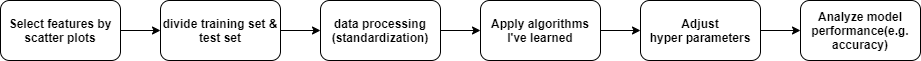

### Result & Codes

In [1]:
import os
import math
import numpy as np
import pandas as pd
from IPython.display import HTML
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
### Plot the scatter graph to understand the data distribution
def plot_feature(X, y, resolution = 0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
                           
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')        
print('Import necessary modules and define our functions successfully!')

Import necessary modules and define our functions successfully!


In [2]:
curr_dir_wine = os.getcwd() + '\wine.data'
df_wine = pd.read_csv(curr_dir_wine, header = None)
print('Understand the wine.data')
df_wine.head()

Understand the wine.data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# try select features by SBS algorith and KNN
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from itertools import combinations

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

I select 0th feature and 9th feature


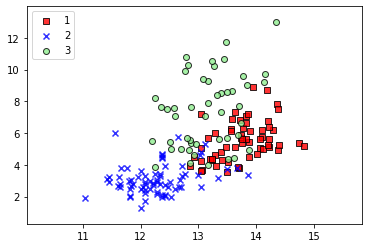

But it does not looked so good... 
So, I choose another way to select my features


In [4]:
# KNN + SBS to select two features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
test_count_y = np.bincount(y_test).sum() # for draw the decision boundary

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

knn_sel = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn_sel, k_features=2)
sbs.fit(X_train_std, y_train)

tar_k = list(sbs.subsets_[-1])
print(f'I select {tar_k[0]}th feature and {tar_k[1]}th feature')

# apply these two features for drawing
X_train = X_train[:, tar_k]
X_test = X_test[:, tar_k]
X_train_std = X_train_std[:, tar_k]
X_test_std = X_test_std[:, tar_k]

X_combined = np.vstack((X_train, X_test))
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_feature(X_combined, y_combined)
plt.legend(loc='upper left')
plt.show()

print('But it does not looked so good... \nSo, I choose another way to select my features')

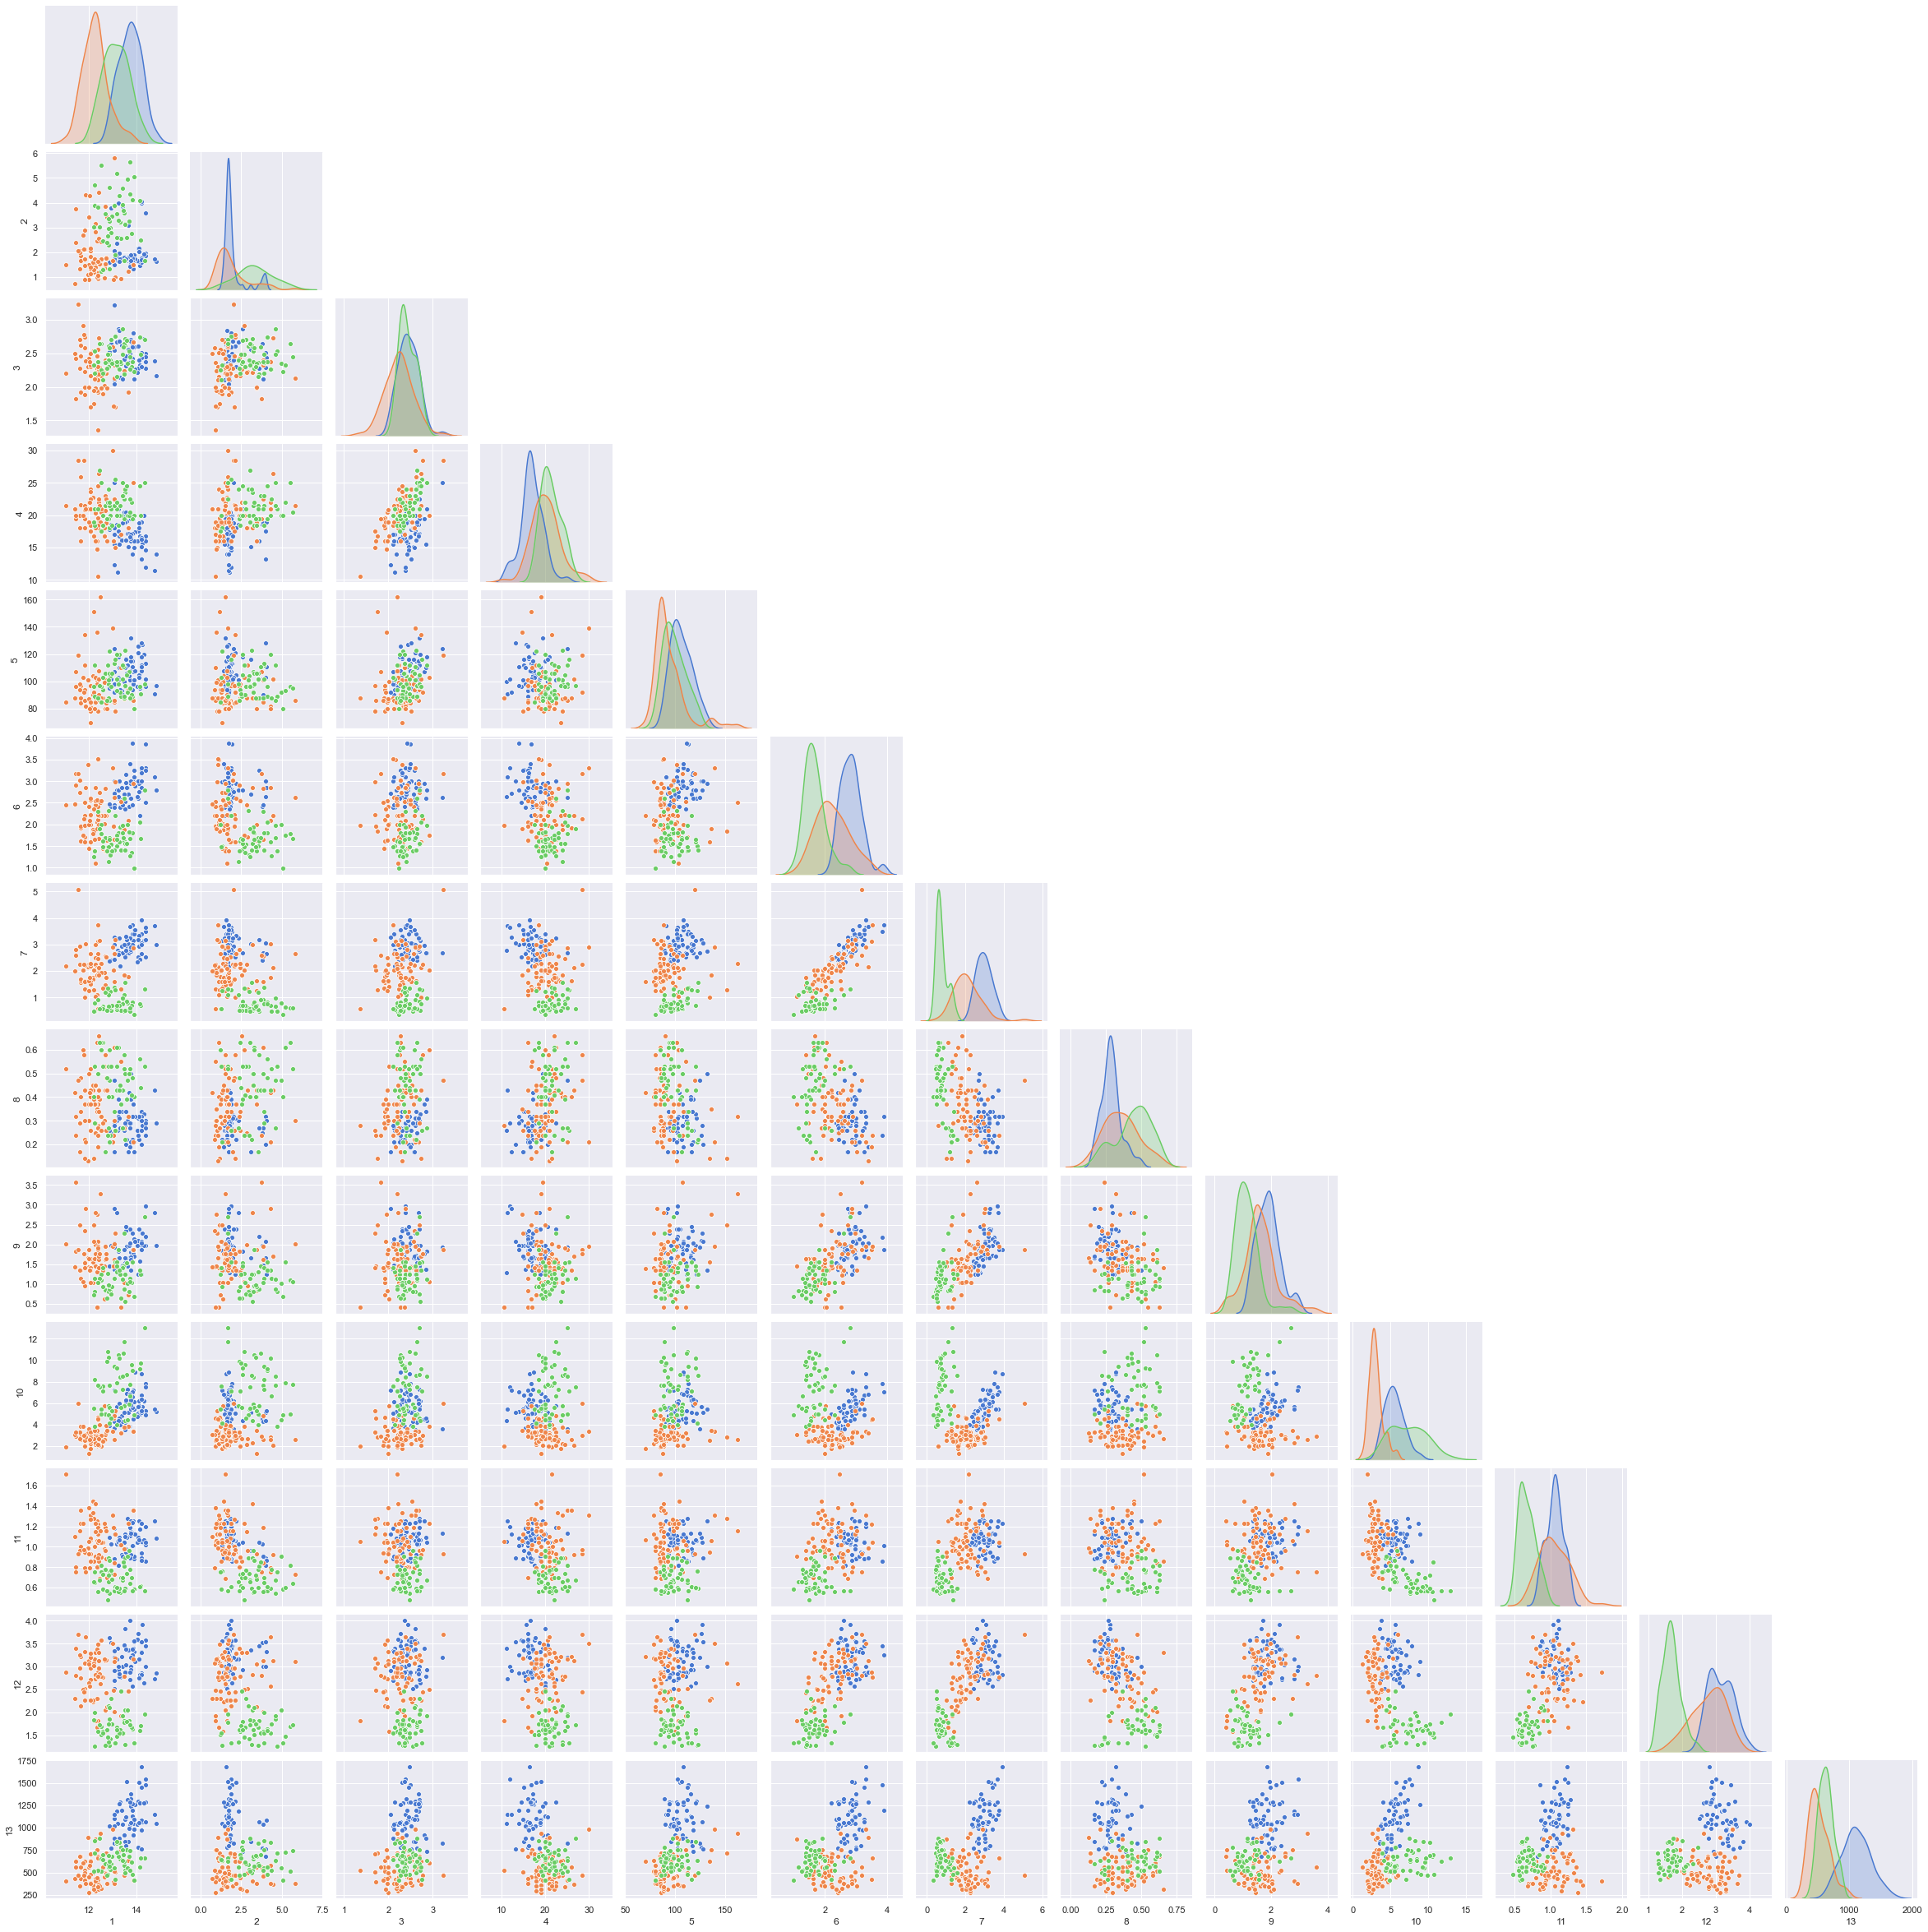

In [5]:
# select features by my method
import seaborn as sns
sns.set(style = 'darkgrid', palette='muted')
sns.set_context(font_scale=1.5) # enlarge font

features_plot = sns.pairplot(df_wine, hue = 0, corner = True) # "hue = 0" means that use the first column i.e labels
features_plot._legend.remove() # remove the legend
plt.show()

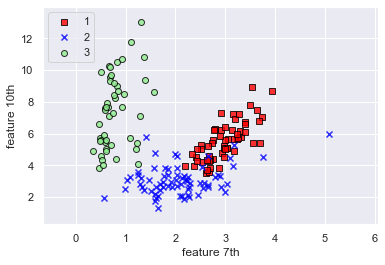

In [6]:
# Choose features from the above scatter plots by pairplot

X = df_wine.iloc[:, [7, 10]].values
y = df_wine.iloc[:, 0].values
# print('Two Features have been selected!')
plot_feature(X, y)
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

In [7]:
import matplotlib.style
matplotlib.style.use('default') # Change back to the default style for plt

# Data preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
test_count_y = np.bincount(y_test).sum() # for draw the decision boundary

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# combined suffix data is for drawing the boundary
X_combined = np.vstack((X_train, X_test))
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


print('Data preprocessing successfully!')

Data preprocessing successfully!


C: 0.01, Acc: 68.519%

C: 0.10, Acc: 88.889%

C: 1.00, Acc: 92.593%

C: 2.00, Acc: 92.593%

C: 5.00, Acc: 92.593%

C: 10.00, Acc: 92.593%

C: 50.00, Acc: 92.593%

C: 100.00, Acc: 92.593%

C: 200.00, Acc: 92.593%

C: 500.00, Acc: 92.593%

----------------------------------------------------------------------------------------------------
C: 0.01, Accuracy: 68.519%


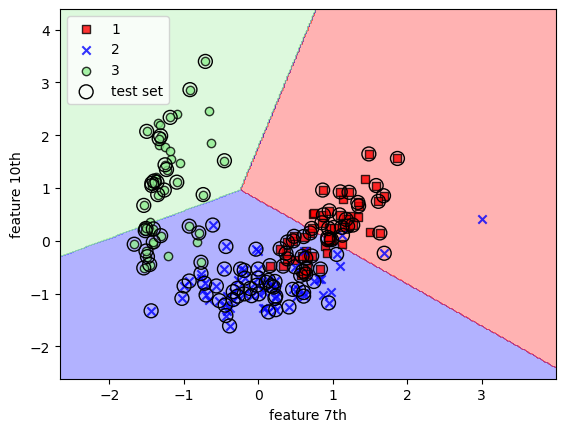

----------------------------------------------------------------------------------------------------
C: 0.10, Accuracy: 88.889%


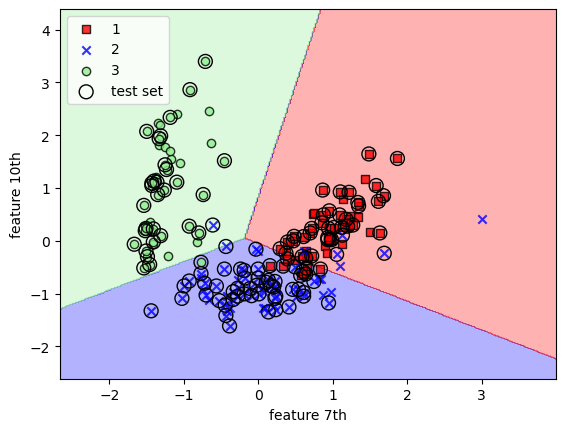

----------------------------------------------------------------------------------------------------
C: 1.00, Accuracy: 92.593%


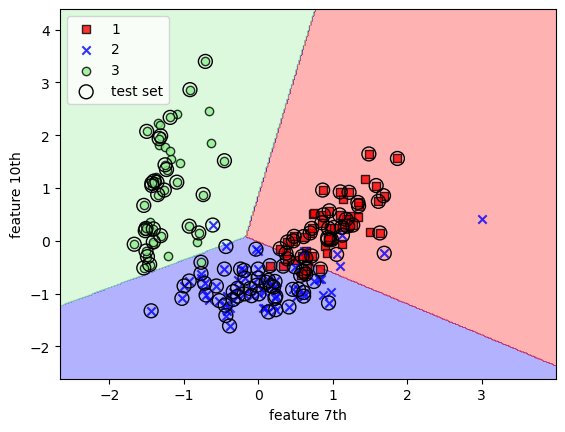

----------------------------------------------------------------------------------------------------
Finally, I select the following hyper-parameters with the performance!
Final Value of C: 1.0, Final Accuracy: 92.593%


In [8]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

C_sel = [0.01, 0.1, 1, 2, 5, 10, 50, 100, 200, 500]

log_list = []

for my_C in C_sel:
    log_reg = LogisticRegression(C = my_C, random_state = 1, solver = 'lbfgs', multi_class = 'ovr')
    log_reg.fit(X_train_std, y_train)
    score = log_reg.score(X_test_std, y_test)
    
    print(f'C: {my_C:3.2f}, Acc: {score * 100:.3f}%')
    print()
    log_list.append((log_reg, my_C, score * 100))
    
print('-' * 100)
print(f'C: {log_list[0][1]:3.2f}, Accuracy: {log_list[0][2]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = log_list[0][0], test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'C: {log_list[1][1]:3.2f}, Accuracy: {log_list[1][2]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = log_list[3][0], test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'C: {log_list[2][1]:3.2f}, Accuracy: {log_list[2][2]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = log_list[2][0], test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

# select the best in my thinking
Final_lr_C = log_list[2][1]
Final_lr_acc= log_list[2][2]
print('-' * 100)
print('Finally, I select the following hyper-parameters with the performance!')
print(f'Final Value of C: {Final_lr_C:3.1f}, Final Accuracy: {Final_lr_acc:.3f}%')

### <font color="purple">Discussion (Logistic regression)</font>

我的實作有選擇出幾個值得探究的情況來去畫decision boundary，共畫出三張分割圖<br>
第一張圖可以發現在C較小(e.g. 0.01)的時候切分還並不完全，應該是regularization太強，導致有underfitting的情況發生<br>
而將C增加，從第二、三張圖可以發現切分的越來越漂亮，並且也沒有明顯overfitting的現象<br>
因此最後選擇的model為 **C = 1** 時，並可以達到 **92.593%** 的準確度

C: 0.001, Acc: 38.889%

C: 0.010, Acc: 66.667%

C: 0.100, Acc: 92.593%

C: 1.000, Acc: 92.593%

C: 2.000, Acc: 90.741%

C: 5.000, Acc: 90.741%

C: 10.000, Acc: 92.593%

C: 50.000, Acc: 92.593%

----------------------------------------------------------------------------------------------------
C: 0.001, Acc: 38.889%


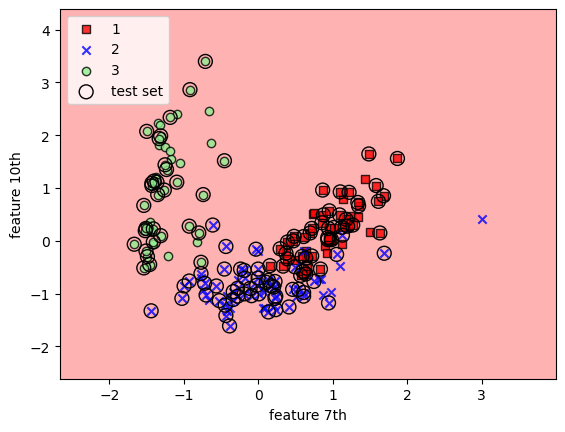

----------------------------------------------------------------------------------------------------
C: 0.010, Acc: 66.667%


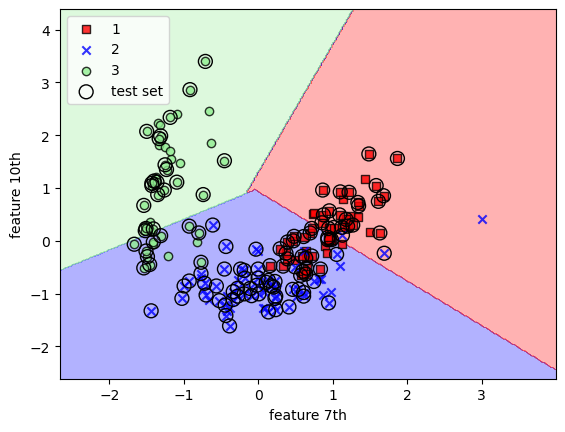

----------------------------------------------------------------------------------------------------
C: 0.100, Acc: 92.593%


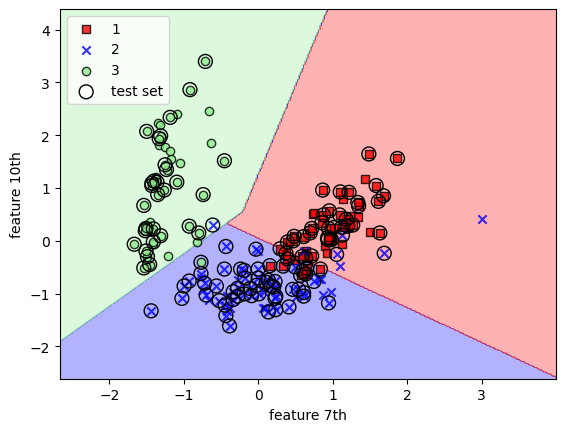

----------------------------------------------------------------------------------------------------
C: 2.000, Acc: 90.741%


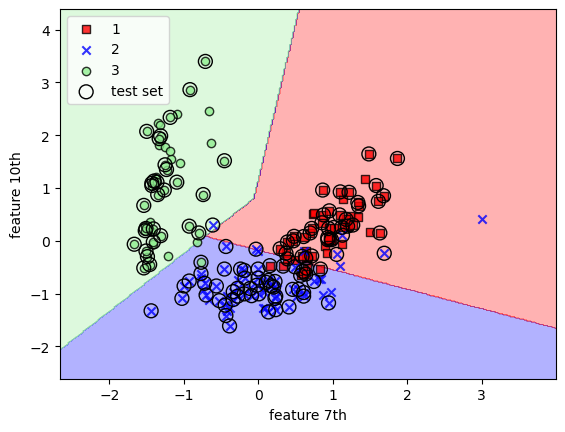

----------------------------------------------------------------------------------------------------
Finally, I select the following hyper-parameters with the performance!
Final Value of C: 0.1, Final Accuracy: 92.593%


In [9]:
# Linear SVM

from sklearn.svm import SVC
C_sel = [0.001, 0.01, 0.1, 1, 2, 5, 10, 50]
svm_list = []

for my_C in C_sel:
    svm = SVC(kernel = 'linear', random_state = 1, C = my_C)
    svm.fit(X_train_std, y_train)
    score = svm.score(X_test_std, y_test)
    print(f'C: {my_C:3.3f}, Acc: {score * 100:.3f}%')
    print()
    svm_list.append((svm, my_C, score * 100))

print('-' * 100)
print(f'C: {svm_list[0][1]:3.3f}, Acc: {svm_list[0][2]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = svm_list[0][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'C: {svm_list[1][1]:3.3f}, Acc: {svm_list[1][2]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = svm_list[1][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'C: {svm_list[2][1]:3.3f}, Acc: {svm_list[2][2]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = svm_list[2][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()


print('-' * 100)
print(f'C: {svm_list[4][1]:3.3f}, Acc: {svm_list[4][2]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = svm_list[4][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

# select the best in my thinking
Final_svm_C = svm_list[2][1]
Final_svm_acc = svm_list[2][2]
print('-' * 100)
print('Finally, I select the following hyper-parameters with the performance!')
print(f'Final Value of C: {Final_svm_C:3.1f}, Final Accuracy: {Final_svm_acc:.3f}%')

### <font color="purple">Discussion (Linear SVM)<font>

我的實作有選擇出幾個值得探究的情況來去畫decision boundary，共畫出四張分割圖<br>
第一張圖可以發現在C較小(e.g. 0.001)的時候幾乎完全沒有分類，明顯是regularization太強，導致有嚴重underfitting的情況發生<br>
而將C增加，從第二、三張圖可以發現切分的越來越漂亮，並且也沒有明顯overfitting的現象<br>
但直到C增加至2.0時，可以從第四張圖觀察到「紅綠」分界已經有過度折線的感覺了，故推論這樣的C可能有些許overfitting<br>
因此我最後選擇的model為 **C = 0.1** 時，並可以達到 **92.593%** 的準確度

C: 0.010, gamma: 0.1, Acc: 38.889%

C: 0.010, gamma: 0.5, Acc: 38.889%

C: 0.010, gamma: 1.0, Acc: 38.889%

C: 0.010, gamma: 5.0, Acc: 38.889%

C: 0.010, gamma: 10.0, Acc: 38.889%

C: 0.010, gamma: 100.0, Acc: 38.889%

C: 0.100, gamma: 0.1, Acc: 81.481%

C: 0.100, gamma: 0.5, Acc: 92.593%

C: 0.100, gamma: 1.0, Acc: 94.444%

C: 0.100, gamma: 5.0, Acc: 83.333%

C: 0.100, gamma: 10.0, Acc: 51.852%

C: 0.100, gamma: 100.0, Acc: 38.889%

C: 0.200, gamma: 0.1, Acc: 90.741%

C: 0.200, gamma: 0.5, Acc: 94.444%

C: 0.200, gamma: 1.0, Acc: 94.444%

C: 0.200, gamma: 5.0, Acc: 92.593%

C: 0.200, gamma: 10.0, Acc: 87.037%

C: 0.200, gamma: 100.0, Acc: 38.889%

C: 1.000, gamma: 0.1, Acc: 92.593%

C: 1.000, gamma: 0.5, Acc: 92.593%

C: 1.000, gamma: 1.0, Acc: 92.593%

C: 1.000, gamma: 5.0, Acc: 90.741%

C: 1.000, gamma: 10.0, Acc: 88.889%

C: 1.000, gamma: 100.0, Acc: 70.370%

C: 2.000, gamma: 0.1, Acc: 94.444%

C: 2.000, gamma: 0.5, Acc: 92.593%

C: 2.000, gamma: 1.0, Acc: 90.741%

C: 2.000, gamma:

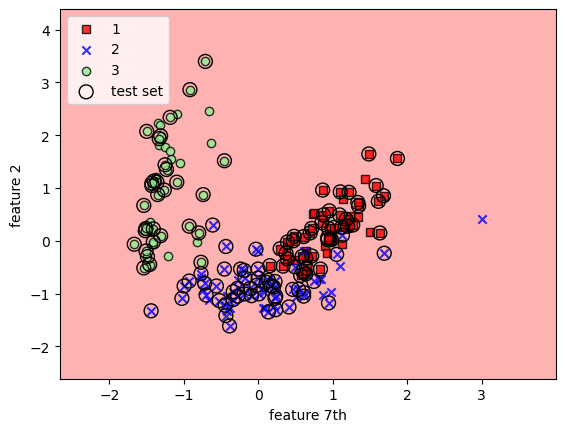

----------------------------------------------------------------------------------------------------
C: 0.200, gamma: 0.1, Acc: 90.741%


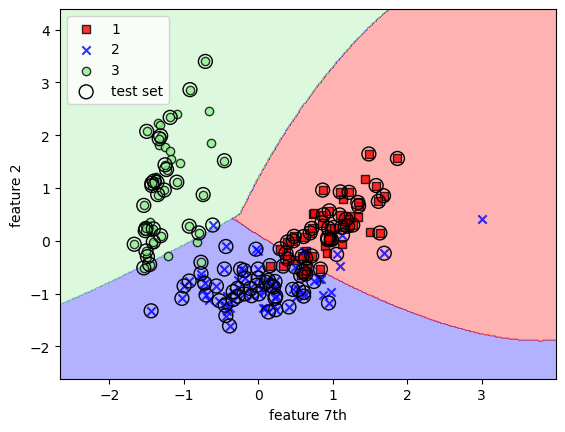

----------------------------------------------------------------------------------------------------
C: 0.200, gamma: 0.5, Acc: 94.444%


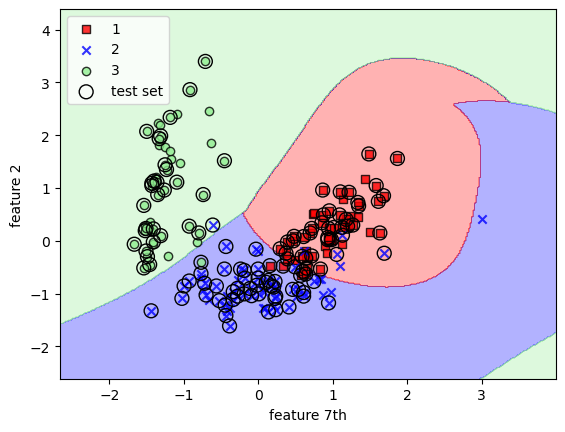

----------------------------------------------------------------------------------------------------
C: 0.200, gamma: 1.0, Acc: 94.444%


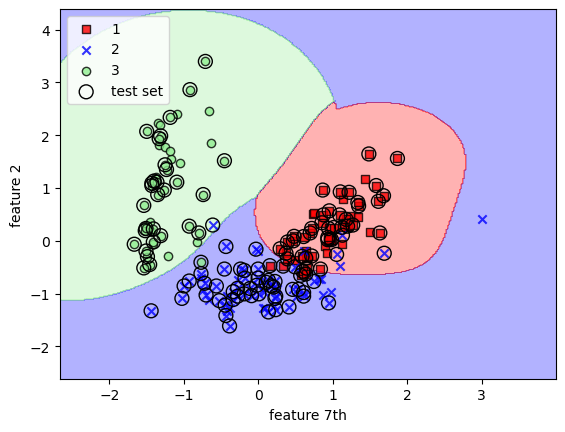

----------------------------------------------------------------------------------------------------
C: 5.000, gamma: 1.0, Acc: 96.296%


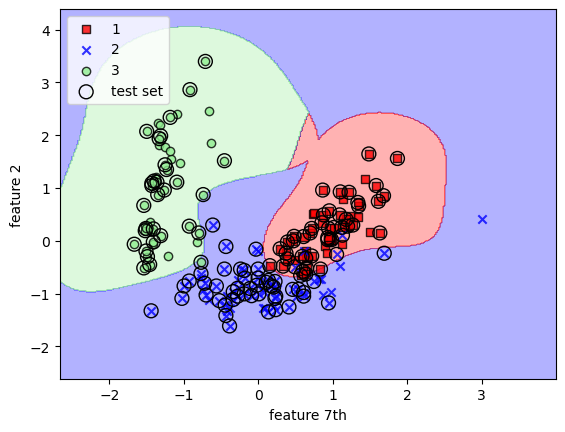

----------------------------------------------------------------------------------------------------
Finally, I select the following hyper-parameters with the performance!
Final Value of C: 0.2, Final Value of gamma: 0.1, Final Accuracy: 90.741%


In [10]:
# kernel SVM

C_sel = [0.01, 0.1,0.2, 1, 2, 5]
gamma_sel = [0.1, 0.5, 1, 5, 10, 100]

rbf_list = []

for my_C in C_sel:
    for my_g in gamma_sel:
        rbf_svm = SVC(kernel = 'rbf', random_state = 1, gamma = my_g, C = my_C)
        rbf_svm.fit(X_train_std, y_train)
        score = rbf_svm.score(X_test_std, y_test)
        rbf_list.append((rbf_svm, my_C, my_g, score * 100))
        print(f'C: {my_C:3.3f}, gamma: {my_g:3.1f}, Acc: {score * 100:.3f}%')
        print()
# print(f'Final Value of C: {rbf_Final_svm_C:3.1f}, \
#         Final Value of gamma: {rbf_Final_svm_gamma:3.1f}, \
#         Final Accuracy: {rbf_Final_svm_acc * 100:.3f}%')


print('-' * 100)
print(f'C: {rbf_list[0][1]:3.3f}, gamma: {rbf_list[0][2]:3.1f}, Acc: {rbf_list[0][3]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = rbf_list[0][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 2')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'C: {rbf_list[12][1]:3.3f}, gamma: {rbf_list[12][2]:3.1f}, Acc: {rbf_list[12][3]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = rbf_list[12][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 2')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'C: {rbf_list[13][1]:3.3f}, gamma: {rbf_list[13][2]:3.1f}, Acc: {rbf_list[13][3]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = rbf_list[13][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 2')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'C: {rbf_list[14][1]:3.3f}, gamma: {rbf_list[14][2]:3.1f}, Acc: {rbf_list[14][3]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = rbf_list[14][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 2')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'C: {rbf_list[-4][1]:3.3f}, gamma: {rbf_list[-4][2]:3.1f}, Acc: {rbf_list[-4][3]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = rbf_list[-4][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 2')
plt.legend(loc='upper left')
plt.show()


# select the best in my thinking
Final_rbf_C = rbf_list[12][1]
Final_rbf_gamma = rbf_list[12][2]
Final_rbf_acc = rbf_list[12][3]
print('-' * 100)
print('Finally, I select the following hyper-parameters with the performance!')
print(f'Final Value of C: {Final_rbf_C:3.1f}, Final Value of gamma: {Final_rbf_gamma:3.1f}, Final Accuracy: {Final_rbf_acc:.3f}%')

### <font color="purple">Discussion (Kernel SVM)<font>

我的實作有選擇出幾個值得探究的情況來去畫decision boundary，共畫出五張分割圖<br>
首先，第一張圖C很小(約0.01)很明顯分割不佳，是regularizaiton過度的結果，導致underfitting<br>
第二張圖將C提升至0.2，gamma = 0.1，觀察切割圖會發現切分的不差，而且也沒有明顯overfitting的現象<br>
接著觀察下一個情況是，固定C提升gamma = 0.5，會發現第三張圖中「藍色」和「綠色」切進到靠近「紅色」的區間了，此時有一點overfitting的樣子<br>
繼續提升gamma至1，第四張圖中會發現藍色嚴重地切到原本該屬於綠色和紅色的區域，這時overfitting越趨明顯<br>
最後一張圖是我調參過程中準確率最高的一組，但從切分圖會發現overfitting非常嚴重，紅色跟綠色的區域已經幾乎剩下sample附近而已，故如此也並不是一個好model，會有較高的generallization error<br>
因此綜合考量後，我最後選擇的model並非準確率最高的那組，而是 overfitting最不明顯的那組，即**C = 0.2, gamma = 0.1** 時，可以達到 **90.741%** 的準確度

depth: 1, Acc: 61.111%

depth: 2, Acc: 88.889%

depth: 3, Acc: 92.593%

depth: 4, Acc: 92.593%

depth: 5, Acc: 92.593%

depth: 6, Acc: 94.444%

depth: 7, Acc: 94.444%

----------------------------------------------------------------------------------------------------
Depth: 2.000, Acc: 88.889%


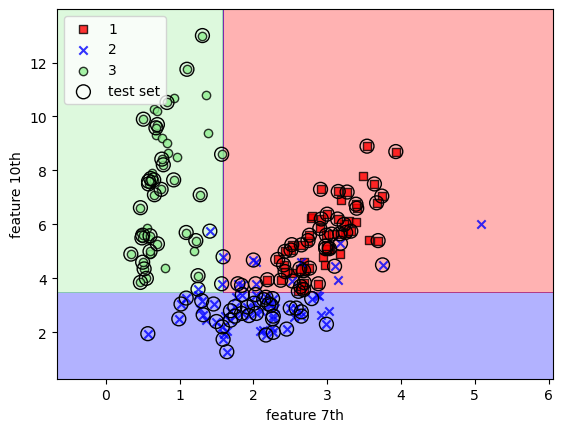

----------------------------------------------------------------------------------------------------
Depth: 3.000, Acc: 92.593%


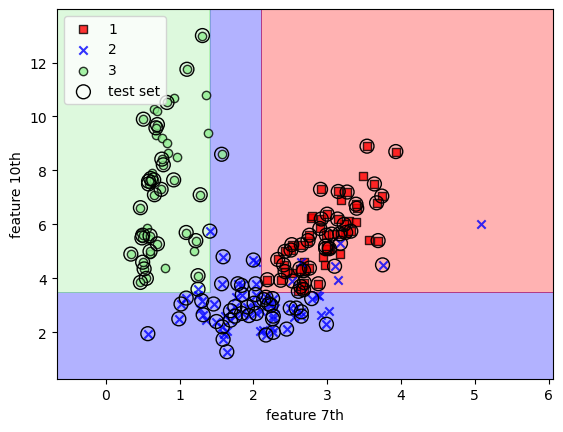

----------------------------------------------------------------------------------------------------
Depth: 6.000, Acc: 94.444%


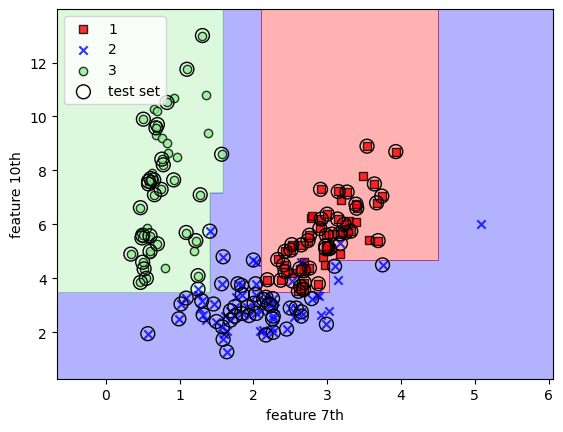

----------------------------------------------------------------------------------------------------
Finally, I select the following hyper-parameters with the performance!
Final Value of depth: 2, Final Accuracy: 88.889%


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_list = []

for d in range(1, 8):
    tree_model = DecisionTreeClassifier(criterion = 'gini', 
                                        max_depth = d, 
                                        random_state = 1)
    tree_model.fit(X_train, y_train) # no need to standardize
    score = tree_model.score(X_test, y_test)
    tree_list.append((tree_model, d, score * 100))
    print(f'depth: {d}, Acc: {score* 100:.3f}%\n')
    

print('-' * 100)
print(f'Depth: {tree_list[1][1]:3.3f}, Acc: {tree_list[1][2]:.3f}%')
plot_decision_regions(X_combined, y_combined, classifier = tree_list[1][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'Depth: {tree_list[2][1]:3.3f}, Acc: {tree_list[2][2]:.3f}%')
plot_decision_regions(X_combined, y_combined, classifier = tree_list[2][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'Depth: {tree_list[5][1]:3.3f}, Acc: {tree_list[5][2]:.3f}%')
plot_decision_regions(X_combined, y_combined, classifier = tree_list[5][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

# select the best in my thinking
Final_tree_depth = tree_list[1][1]
Final_tree_acc = tree_list[1][2]
print('-' * 100)
print('Finally, I select the following hyper-parameters with the performance!')
print(f'Final Value of depth: {Final_tree_depth}, Final Accuracy: {Final_tree_acc:.3f}%')

Plot the decision tree


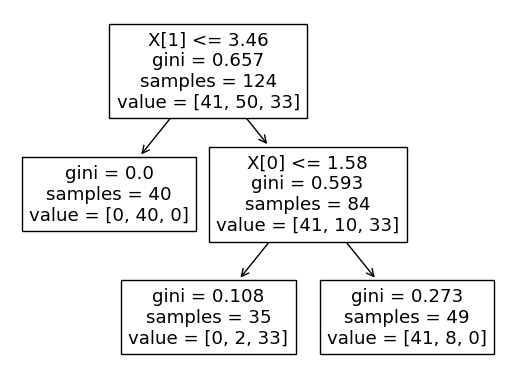

In [12]:
print('Plot the decision tree')
tree.plot_tree(tree_list[1][0])
plt.show()

Detailed version of decision tree result!


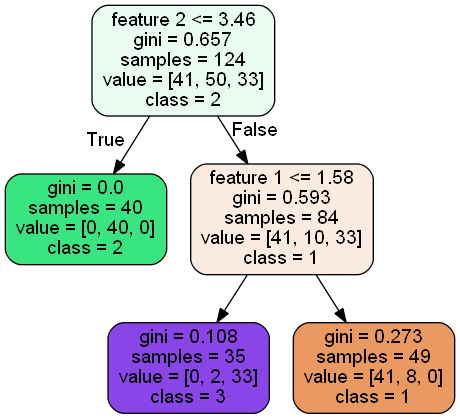

In [13]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(tree_list[1][0],
                           filled=True, 
                           rounded=True,
                           class_names=['1', 
                                        '2',
                                        '3'],
                           feature_names=['feature 1', 
                                          'feature 2'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data)
print('Detailed version of decision tree result!')
Image(graph.create_png())

### <font color="purple">Discussion (Decision Tree)<font>

我的實作有選擇出幾個值得探究的情況來去畫decision boundary，共畫出三張分割圖<br>
第一張圖可以發現在max_depth = 2時，分類上已經相當不錯<br>
而持續上調max_depth，看到第二張圖，提升max_depth = 3，儘管準確度上升了，但觀察分割圖會發現中間藍色切到了一塊長條區域，雖然現階段並不影響結果<br>
這樣的切分可能導致test data若落於中央都會被歸為藍色區域，導致generalization error變高<br>
若把max_depth = 6，會看到藍色更明顯地去切到了更多區域，而這已經有overfitting的現象了，並非一個好的model<br>
因此我最後只考慮max_depth = 2 or 3的model，而考量到generalization error的可能<br>
最終我選擇的model為 **max_depth = 2** 時，並可以達到 **88.889%** 的準確度

depth: 1, num of estimator: 5, Acc: 87.037%
depth: 2, num of estimator: 5, Acc: 90.741%
depth: 3, num of estimator: 5, Acc: 92.593%
depth: 4, num of estimator: 5, Acc: 92.593%
depth: 1, num of estimator: 10, Acc: 92.593%
depth: 2, num of estimator: 10, Acc: 94.444%
depth: 3, num of estimator: 10, Acc: 94.444%
depth: 4, num of estimator: 10, Acc: 94.444%
depth: 1, num of estimator: 20, Acc: 92.593%
depth: 2, num of estimator: 20, Acc: 92.593%
depth: 3, num of estimator: 20, Acc: 94.444%
depth: 4, num of estimator: 20, Acc: 94.444%
depth: 1, num of estimator: 25, Acc: 92.593%
depth: 2, num of estimator: 25, Acc: 92.593%
depth: 3, num of estimator: 25, Acc: 94.444%
depth: 4, num of estimator: 25, Acc: 94.444%
depth: 1, num of estimator: 30, Acc: 92.593%
depth: 2, num of estimator: 30, Acc: 92.593%
depth: 3, num of estimator: 30, Acc: 94.444%
depth: 4, num of estimator: 30, Acc: 94.444%
----------------------------------------------------------------------------------------------------
Dep

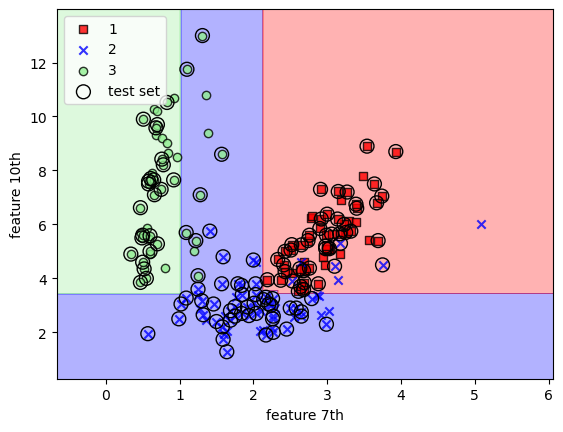

----------------------------------------------------------------------------------------------------
Depth: 3, num of Estimator: 5,  Acc: 92.593%


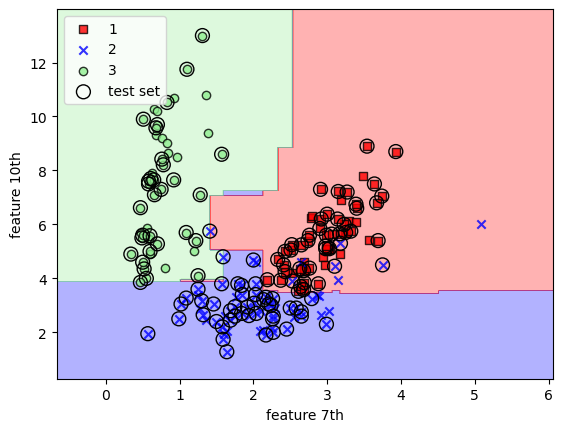

----------------------------------------------------------------------------------------------------
Depth: 2, num of Estimator: 10,  Acc: 94.444%


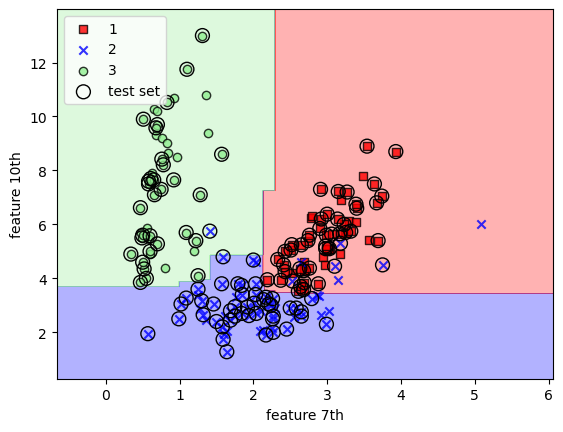

----------------------------------------------------------------------------------------------------
Finally, I select the following hyper-parameters with the performance!
Final Value of depth: 2, Final Value of estimator: 10, Final Accuracy: 94.444%


In [14]:
from sklearn.ensemble import RandomForestClassifier

forest_list = []

estimator_sel = [5, 10, 20, 25, 30]

# This factor d to manipulate hyper-parameter
for est in estimator_sel:
    for d in range(1, 5):
        forest = RandomForestClassifier(criterion='entropy',
                                        n_estimators=est,
                                        max_depth=d,
                                        random_state=1,
                                        n_jobs=6)
        
        forest.fit(X_train, y_train)
        score = forest.score(X_test, y_test)
        forest_list.append((forest, d, est, score * 100))
        print(f'depth: {d}, num of estimator: {est}, Acc: {score * 100:.3f}%')

print('-' * 100)
print(f'Depth: {forest_list[0][1]}, num of Estimator: {forest_list[0][2]}, Acc: {forest_list[0][3]:.3f}%')
plot_decision_regions(X_combined, y_combined, classifier = forest_list[0][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'Depth: {forest_list[2][1]}, num of Estimator: {forest_list[2][2]},  Acc: {forest_list[2][3]:.3f}%')
plot_decision_regions(X_combined, y_combined, classifier = forest_list[2][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'Depth: {forest_list[5][1]}, num of Estimator: {forest_list[5][2]},  Acc: {forest_list[5][3]:.3f}%')
plot_decision_regions(X_combined, y_combined, classifier = forest_list[5][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

# select the best in my thinking
Final_forest_depth = forest_list[5][1]
Final_forest_est = forest_list[5][2]
Final_forest_acc = forest_list[5][3]
print('-' * 100)
print('Finally, I select the following hyper-parameters with the performance!')
print(f'Final Value of depth: {Final_forest_depth}, Final Value of estimator: {Final_forest_est}, Final Accuracy: {Final_forest_acc:.3f}%')

### <font color="purple">Discussion (Random forest)<font>

我的實作有選擇出幾個值得探究的情況來去畫decision boundary，共畫出三張分割圖<br>
第一張圖可以發現在max_depth只有1，搭配estimator = 5時，分類上已經狀況不錯，但細看會發現「藍綠」邊界似乎可以分的更好<br>
於是看到第二張圖，單純提升max_depth至3層，儘管準確度上升了，但觀察分割圖會發現紅色有一塊明顯切到中央，而這並非所想要的結果<br>
這樣的切分可能導致test data若落於中央都會被歸為紅色區域，導致generalization error變高<br>
接著，降低一點max_depth至2，與此同時提升estomatior = 10，可以發現前面紅色切到中央的情況不見了，如此一來落於中央的test data可以被更好的分類
因此我最後選擇的model為 **max_depth = 2** 時，並可以達到 **94.444%** 的準確度

num of neighbors: 1, Acc: 92.593%
num of neighbors: 2, Acc: 87.037%
num of neighbors: 3, Acc: 90.741%
num of neighbors: 4, Acc: 90.741%
num of neighbors: 5, Acc: 94.444%
num of neighbors: 6, Acc: 92.593%
num of neighbors: 7, Acc: 94.444%
num of neighbors: 8, Acc: 92.593%
num of neighbors: 9, Acc: 94.444%
num of neighbors: 10, Acc: 92.593%
num of neighbors: 11, Acc: 94.444%
----------------------------------------------------------------------------------------------------
num of neighbors: 2, Acc: 87.037%


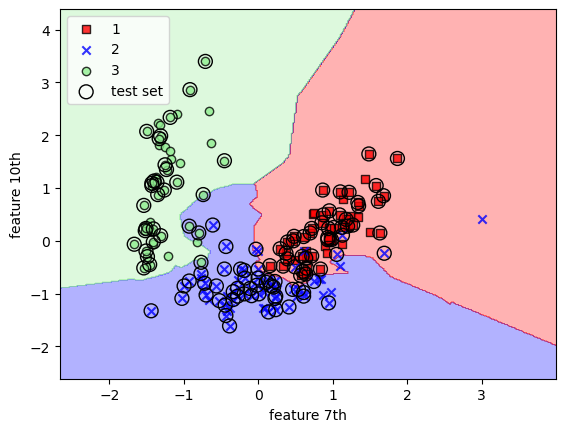

----------------------------------------------------------------------------------------------------
num of neighbors: 3, Acc: 90.741%


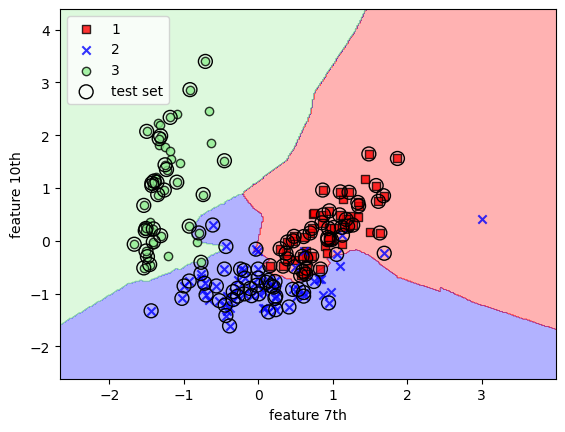

----------------------------------------------------------------------------------------------------
num of neighbors: 5, Acc: 94.444%


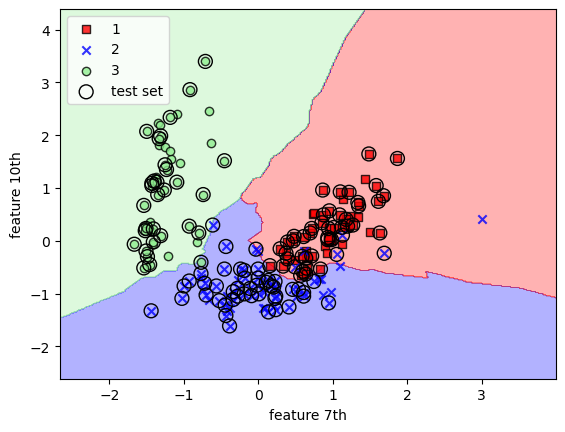

----------------------------------------------------------------------------------------------------
num of neighbors: 11, Acc: 94.444%


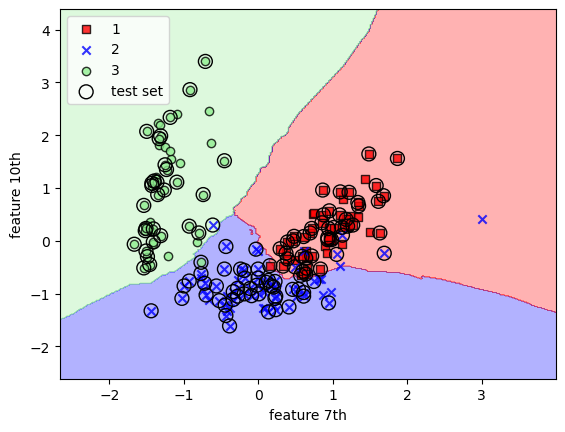

----------------------------------------------------------------------------------------------------
Finally, I select the following hyper-parameters with the performance!
Final Value of n neighbors: 5, Final Accuracy: 94.444%


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_list = []
# try different n
for n in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=n, 
                               p=2, 
                               metric='minkowski')
    knn.fit(X_train_std, y_train)
    score = knn.score(X_test_std, y_test)
    knn_list.append((knn, n, score * 100))
    print(f'num of neighbors: {n}, Acc: {score * 100:.3f}%')

    
print('-' * 100)
print(f'num of neighbors: {knn_list[1][1]}, Acc: {knn_list[1][2]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = knn_list[1][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'num of neighbors: {knn_list[2][1]}, Acc: {knn_list[2][2]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = knn_list[2][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()    

print('-' * 100)
print(f'num of neighbors: {knn_list[4][1]}, Acc: {knn_list[4][2]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = knn_list[4][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()

print('-' * 100)
print(f'num of neighbors: {knn_list[10][1]}, Acc: {knn_list[10][2]:.3f}%')
plot_decision_regions(X_combined_std, y_combined, classifier = knn_list[10][0], 
                      test_idx = range(test_count_y, 178))
plt.xlabel('feature 7th')
plt.ylabel('feature 10th')
plt.legend(loc='upper left')
plt.show()   

# select the best in my thinking
Final_knn_n = knn_list[4][1]
Final_knn_acc = knn_list[4][2]
print('-' * 100)
print('Finally, I select the following hyper-parameters with the performance!')
print(f'Final Value of n neighbors: {Final_knn_n}, Final Accuracy: {Final_knn_acc:.3f}%')
                        

### <font color="purple">Discussion (KNN)<font>

我的實作有選擇出幾個值得探究的情況來去畫decision boundary，共畫出四張分割圖<br>
第一張圖是n = 2的情況，此時的切分情形還算不錯，但細看三者交界區藍色切了一大塊進去，這並非所想要的結果，有generalization error可能會提高的疑慮
<br>
於是看到第二張圖，提升至n = 3，儘管準確度上升了，但分割情況只有小幅改善<br>
接著觀察第三張圖，n = 5時會發現分割情況更佳了，整體準確度也達到蠻好的水平<br>
最後調整至n = 11，觀察到其狀況與n = 5相比，除了藍紅分割似乎更平滑一點點外，並無太明顯的差別<br>
因此，根據上述討論，我最後選擇的model為 **n = 5** 時，並可以達到 **94.444%** 的準確度

### Discussion & Conclusion

綜合上述training的結果，以下將針對我使用的演算法綜合探討model的performance

Algorithms |  Logistic Regression | Linear SVM  | Kernel SVM | Decision Tree | Random Forest | KNN
--------------|:----------------------------:|:-----------------:|:-------------:|:-------------------:|:--------------------:|:----------:|
Accuracy    | 92.593%                         | 92.593% |   90.741%       | 88.889% | 94.444% | 94.444% |

從上方的表格中，可以獲得一些結論
> Logistic Regression和Linear SVM由於還是建立在線性的分割，因此會有相近的準確度(92.593%左右)。<br><br>
> 而Kernel SVM使用較多資源，應當得到較好的準確度；而事實上在設計的過程中有得到96%的結果，但overfitting的程度嚴重到幾乎不可用，因此最後仍然考量到model的泛用性，還是選擇了沒有overfitting的model，犧牲掉的就是部分accuracy。換言之，Kernal SVM對這組data set來講並非特別合適，因為耗費了相對多的資源，卻得到近似於Linear SVM(甚至劣於)的performance。<br><br>
> Decision tree與Kernel SVM類似，過深會導致嚴重overfitting，故考量泛用性只好犧牲accuracy，最後僅得到不到90%的準確度。<br><br>
> 採用了Ensemble技巧的Random forest，最後在depth並不深的條件下，成功調出94.444%的高準確度，與此同時切分上也沒有像decision tree的嚴重overfitting，我認為是整體表現很好的model<br><br>
> 最後是KNN，在n = 5時有達到了94.444%的準確度，除了三者交界處外，切分上也沒有太明顯的overfitting，整體也是表現算優的model<br>

六種演算法整體考慮下來，我認為若在運算資源足夠且不限制complexity的情形下，選擇**Random forest和KNN可以得到最佳的結果**並且overfitting效果也限制地不差<br>
而若想要省一點資源，可考慮Logistic Regression和Linear SVM，此兩者並無明顯的優劣<br>
至於Kernel SVM和Decision Tree，我認為不太適合此data set，前者耗費過多資源且並無更好的performance，不如使用Linear SVM；後者則是效果普通，隨意更改深度則很容易overfitting<br>
<br>
總結，藉由這次作業，可以讓我們更加熟悉sklearn套件的操作方式，以及認識更不一樣、更複雜的演算法實作方式，並且進一步探討它們的優劣，來應用最合適的模型去解決問題<br>